# ES 335 Machine Learning Pre-Requisite Test

Shardul Junagade

Roll No - 23110297

Batch - BTech CSE - 2nd Year

### Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import jax
import jax.numpy as jnp
import sympy as sp

### Question 1

Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Solution:**

The matrix multiplication of a (n,k) and (k,m) matrix results in a (n,m) matrix (lets say **C**). Each element is calculated by taking the dot product of a row from the first matrix (lets say **A**) and a column from the second matrix (lets say **B**).

$$c_{ij} = \boldsymbol{a_{i}} \cdot \boldsymbol{b_{j}} = \sum_{t=1}^{k} a_{it} \cdot b_{tj}$$

where $a_{it}$ is an element from the i-th row of matrix A and $b_{tj}$ is an element from the j-th column of matrix B.

From the above formula, we can easily calculate the number of multiplication and addition operations required during matrix multiplication. 

- Multiplication Operations:

For each element $c_{ij}$ in the resulting matrix **C**,  *k* multiplications will be performed as there are *k* elements in each row of the first matrix **A** and  each column of the second matrix **B**. There are $n \times m$ elements in the resulting matrix **C**. Thus, the total number of multiplication operations can be calculated as $\underline{n \times m \times k}$.

- Addition Operations:

For each element $c_{ij}$ in the resulting matrix **C**, *k-1* additions will be performing as we are adding *k* numbers (which result from the multiplication operations). There are $n \times m$ elements in the resulting matrix **C**. Thus, the total number of addition operations can be calculated as $\underline{n \times m \times (k-1)}$.

### Question 2

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

**Solution:**

In [2]:
# List of lists method
def multiply_matrices_list_of_lists(A, B):
    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Numpy
def multiply_matrices_numpy(A, B):
    return np.dot(A, B)

# Compare the timing of both solutions
def compare_time_taken(A, B):
    if len(A[0]) != len(B):
        return "Invalid Input! The number of columns in A should be equal to the number of rows in B."
    
    start = time.time()
    multiply_matrices_list_of_lists(A, B)
    end = time.time()
    print(f"Time taken by list of lists:", (end - start)*1000 , "ms")

    start = time.time()
    multiply_matrices_numpy(A, B)
    end = time.time()
    print(f"Time taken by numpy:", (end - start)*1000 , "ms")

# Generate random matrices
A = np.random.randint(1, 10, (100, 100))
B = np.random.randint(1, 10, (100, 100))

# Compare timing
compare_time_taken(A, B)

Time taken by list of lists: 1235.6033325195312 ms
Time taken by numpy: 2.002239227294922 ms


We can see that Numpy is significantly faster than list of lists. This is because numpy arrays are vectorized and we can perform complex operations on entire matrices at once, whereas list of lists which is implemented using nested loops, which has very high time complexity.

### Question 3

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Solution:**

Finding the median of the array using the above mentioned method will require $n/2$ passes of the array and each pass will have a time complexity of $O(n)$. Thus, the time comlpexity for the complete operation can be calculated as $(n/2) \cdot O(n) = O(n^2)$.

In [3]:
# First Method
def find_kth_largest_element(arr, k):
    arr_copy = arr.tolist()
    for _ in range(k):
        max_num = arr_copy[0]
        max_index = 0
        for i in range(1, len(arr_copy)):
            if arr_copy[i] > max_num:
                max_num = arr_copy[i]
                max_index = i
        arr_copy.pop(max_index)
    return max_num

def find_median_highest_element(arr):
    n = len(arr)
    if n % 2 == 0:
        return (find_kth_largest_element(arr, n//2) + find_kth_largest_element(arr, n//2 + 1)) / 2
    else:
        return find_kth_largest_element(arr, n//2 + 1)

**Alternate Method:**

Sort the array first using merge sort or the in-built sorted function of Python which uses Tim sort and then get the middle element using indexing. This method will have a time complexity of $O(n logn)$, which is significantly better than the first method.

In [4]:
# Sorting Method
def find_median_sort(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        return (sorted_arr[n//2] + sorted_arr[n//2 - 1]) / 2
    else:
        return sorted_arr[n//2]

**Numpy Method:**

`numpy.median` is a in-built function provided by Numpy to calculate the median of a numpy array.

In [5]:
# Numpy
def find_median_numpy(arr):
    return np.median(arr)

In [6]:
# Compare the timing of the 3 solutions
def compare_time_taken_median(arr):
    start = time.time()
    find_median_highest_element(arr)
    end = time.time()
    print(f"Time taken by highest element method:", (end - start)*1000 , "ms")

    start = time.time()
    find_median_sort(arr)
    end = time.time()
    print(f"Time taken by sorting method:", (end - start)*1000 , "ms")

    start = time.time()
    find_median_numpy(arr)
    end = time.time()
    print(f"Time taken by numpy:", (end - start)*1000 , "ms")


arr = np.random.randint(1, 10000, 10000)

# Compare timing
compare_time_taken_median(arr)

Time taken by highest element method: 6424.796342849731 ms
Time taken by sorting method: 6.738185882568359 ms
Time taken by numpy: 4.031658172607422 ms


### Question 4

Q4. What is the gradient of the following function with respect to x and y?
$$x^2 y + y^3 sin(x)$$

**Solution:**

Let $f(x,y) = x^2 y + y^3 sin(x)$. To find the gradient of f(x,y) w.r.t x and y, we need to calculate the partial derivatives of f(x,y) w.r.t x and y.

- To calculate the partial derivative of f(x,y) w.r.t x, we will calculate the derivative assuming y to be any constant.

$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2 y + y^3 \sin(x) \right) = 2x y + y^3 \cos(x)
$$

- To calculate the partial derivative of f(x,y) w.r.t y, we will calculate the derivative assuming x to be any constant.
$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2 y + y^3 \sin(x) \right) = x^2 + 3y^2 \sin(x)
$$


### Question 5

Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

**Solution:**

In [7]:
def q4_f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Mathematical gradient calculation
def gradient_mathematics(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

# JAX gradient method
def gradient_jax(x, y):
    return jax.grad(q4_f)(x, y), jax.grad(q4_f, 1)(x, y)

x = jnp.array(10.0)
y = jnp.array(7.0)

print("Mathematical Gradient Method:")
print("df/dx at (10, 7) =", gradient_mathematics(x, y)[0])
print("df/dy at (10, 7) =", gradient_mathematics(x, y)[1])
print("\nJAX Gradient Method:")
print("df/dx at (10, 7) =", gradient_jax(x, y)[0])
print("df/dy at (10, 7) =", gradient_jax(x, y)[1])

Mathematical Gradient Method:
df/dx at (10, 7) = -147.80151
df/dy at (10, 7) = 20.028893

JAX Gradient Method:
df/dx at (10, 7) = -147.80151
df/dy at (10, 7) = 20.028893


We can see that the gradients calculated by using partial differentiation are equal to those obtained by using the JAX library.

### Question 6

Q6. Use sympy to confirm that you obtain the same gradient analytically.

**Solution:**

In [8]:
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Sympy Gradient Method:")
print("\ndf/dx =", df_dx)
print("df/dy =", df_dy)

x_val = 10.0
y_val = 7.0

# Evaluate the gradient at the given point
df_dx_val = df_dx.evalf(subs={x: x_val, y: y_val})
df_dy_val = df_dy.evalf(subs={x: x_val, y: y_val})

print("\ndf/dx at (10, 7) =", df_dx_val)
print("df/dy at (10, 7) =", df_dy_val)

Sympy Gradient Method:

df/dx = 2*x*y + y**3*cos(x)
df/dy = x**2 + 3*y**2*sin(x)

df/dx at (10, 7) = -147.801534473223
df/dy at (10, 7) = 20.0288966992626


### Question 7

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

In [9]:
student_data = {
    2022: {
        "Branch 1": 
        [
            {"Roll Number": 1,
            "Name": "N",
            "Marks": {"Maths": 100, "English": 70}}
        ],
        "Branch 2": []
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

### Question 8

Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [10]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks
    
    def __repr__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, branch_name, students=None):
        if students is None:
            students = []
        self.branch_name = branch_name
        self.students = students

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        students_str = ', '.join("["+str(student)+"]" for student in self.students)
        return f"Branch Name: {self.branch_name}, Students: [{students_str}]"
    
class Year:
    def __init__(self, year, branches=None):
        if branches is None:
            branches = []
        self.year = year
        self.branches = branches

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        branches_str = ', '.join("["+str(branch)+"]" for branch in self.branches)
        return f"Year: {self.year}, Branches: [{branches_str}]"
    
class StudentData:
    def __init__(self, years=None):
        if years is None:
            years = []
        self.years = years

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        years_str = ', '.join(str(year) for year in self.years)
        return f"Years: [{years_str}]"
    
    
# Create a student object
student1 = Student(1, "N", {"Maths": 100, "English": 70})
print("Student 1: ", student1)

# Create a branch object
branch1 = Branch("Branch 1", [student1])
print("Branch 1: ", branch1)

# Create a year object
year1 = Year(2022, [branch1])
print("Year 1: ", year1)

# Create a student data object
student_data = StudentData([year1])
print("Student Data: ", student_data)

# Create another student object
student2 = Student(2, "M", {"Maths": 90, "English": 80})
print("\nStudent 2:", student2)

# Add the new student to the branch
branch1.add_student(student2)
print("Updated Branch 1: ", branch1)


Student 1:  Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
Branch 1:  Branch Name: Branch 1, Students: [[Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}]]
Year 1:  Year: 2022, Branches: [[Branch Name: Branch 1, Students: [[Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}]]]]
Student Data:  Years: [Year: 2022, Branches: [[Branch Name: Branch 1, Students: [[Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}]]]]]

Student 2: Roll Number: 2, Name: M, Marks: {'Maths': 90, 'English': 80}
Updated Branch 1:  Branch Name: Branch 1, Students: [[Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}], [Roll Number: 2, Name: M, Marks: {'Maths': 90, 'English': 80}]]


### Question 9

Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

i. $ y = x $

ii. $ y = x^2 $

iii. $ y = \frac{x^3}{100} $

iv. $ y = \sin(x) $

v. $ y = \frac{\sin(x)}{x} $

vi. $ y = \log(x) $

vii. $ y = e^x $

**Solution:**

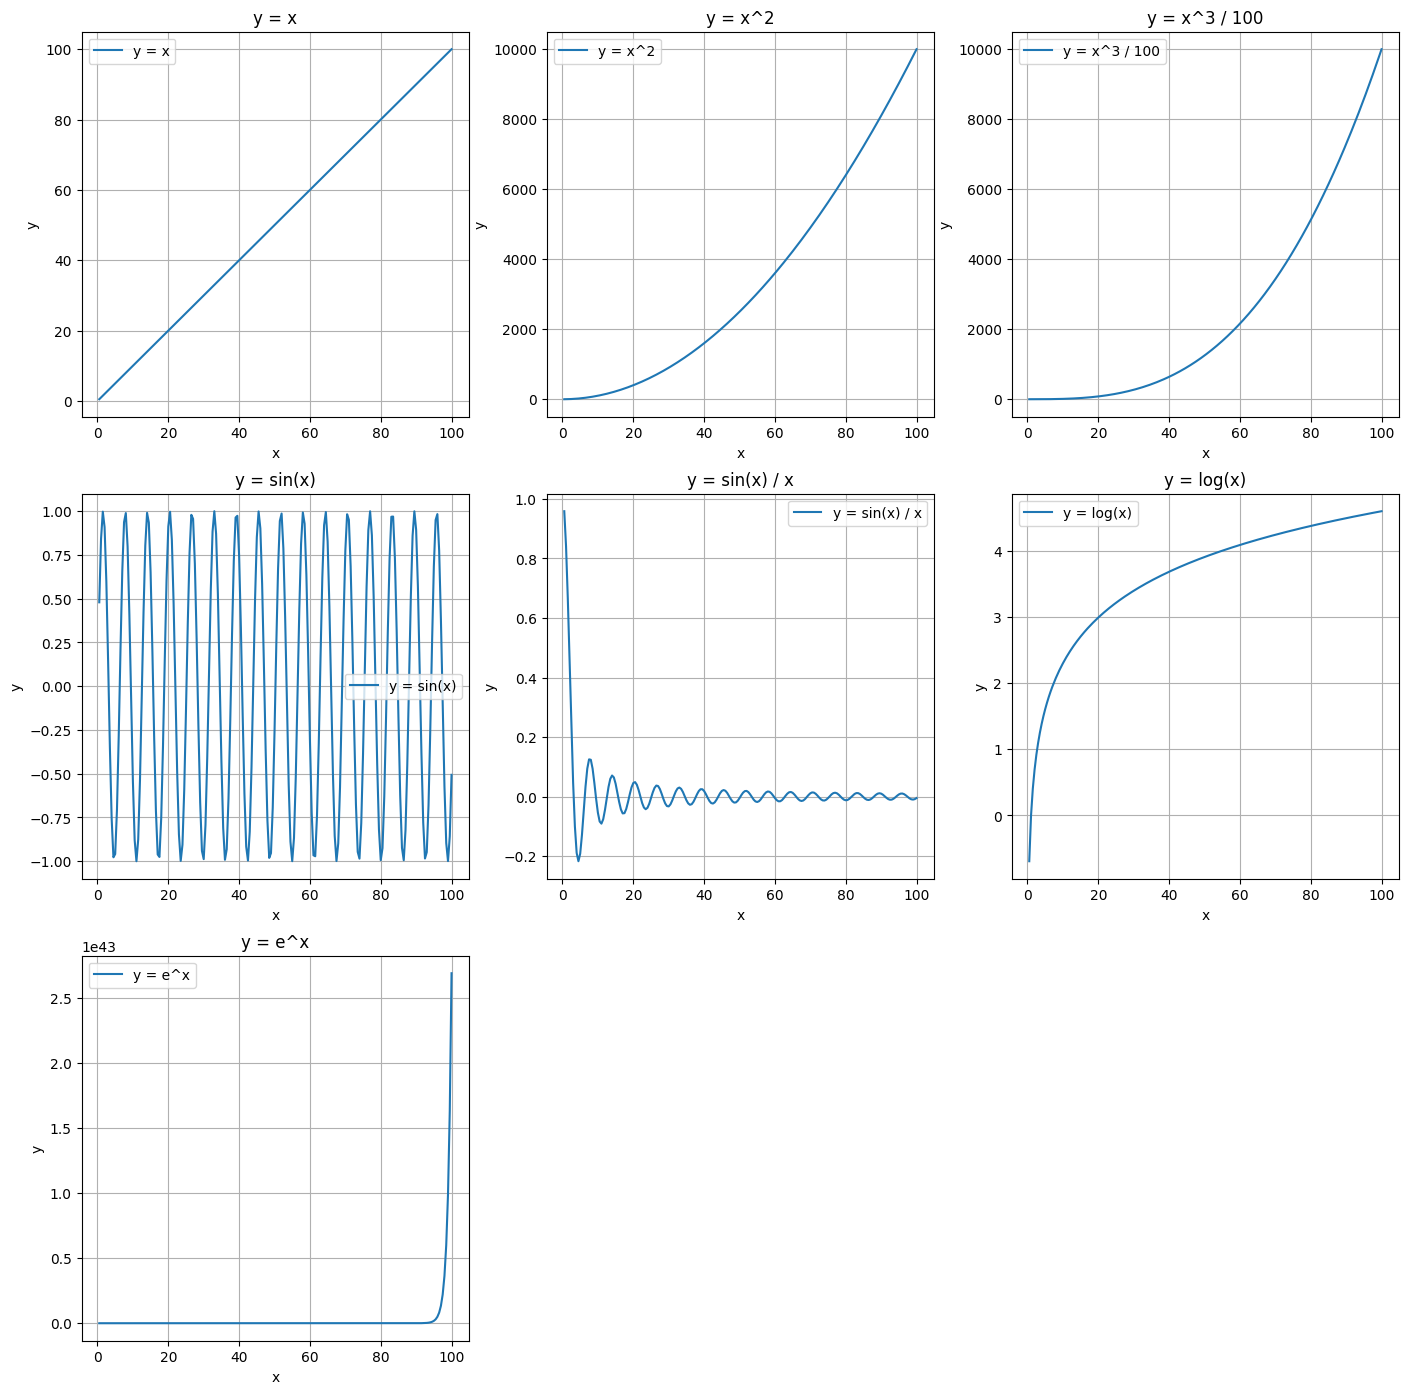

In [11]:
x = np.arange(0.5, 100.5, 0.5)
plt.figure(figsize=(17, 17))

# i) y = x
y1 = x
plt.subplot(3,3,1)
plt.plot(x, y1, label='y = x')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# ii) y = x^2
y2 = x**2
plt.subplot(3,3,2)
plt.plot(x, y2, label='y = x^2')
plt.title('y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# iii) y = x^3 / 100
y3 = x**3 / 100
plt.subplot(3,3,3)
plt.plot(x, y3, label='y = x^3 / 100')
plt.title('y = x^3 / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# iv) y = sin(x)
y4 = np.sin(x)
plt.subplot(3,3,4)
plt.plot(x, y4, label='y = sin(x)')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# v) y = sin(x) / x
y5 = np.sin(x) / x
plt.subplot(3,3,5)
plt.plot(x, y5, label='y = sin(x) / x')
plt.title('y = sin(x) / x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# vi) y = log(x)
y6 = np.log(x)
plt.subplot(3,3,6)
plt.plot(x, y6, label='y = log(x)')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# vii) y = e^x
y7 = np.exp(x)
plt.subplot(3,3,7)
plt.plot(x, y7, label='y = e^x')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.show()


### Question 10

Q10. Using numpy generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

**Solution:**

In [12]:
matrix = np.random.uniform(1, 2, (20,5))
column_values = ["a", "b", "c", "d", "e"]

df = pd.DataFrame(matrix, columns=column_values)
print(df)


# column with the highest standard deviation
max_std_column = df.std().idxmax()
print(f"\nColumn with the highest standard deviation: {max_std_column}")

# row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()
print(f"\nRow with the lowest mean: {min_mean_row}")


           a         b         c         d         e
0   1.189291  1.205375  1.829427  1.037411  1.680756
1   1.983043  1.486276  1.342398  1.321526  1.830136
2   1.832366  1.242693  1.794867  1.105909  1.309191
3   1.198468  1.096302  1.334861  1.399688  1.789248
4   1.095531  1.292135  1.841487  1.676735  1.594463
5   1.745633  1.523631  1.792761  1.106575  1.554635
6   1.574960  1.871806  1.189455  1.269053  1.998429
7   1.202707  1.323286  1.172918  1.311188  1.867223
8   1.810543  1.982336  1.003702  1.017435  1.654102
9   1.371639  1.266634  1.094023  1.064326  1.932855
10  1.023682  1.007912  1.560768  1.604274  1.140784
11  1.482138  1.462817  1.021133  1.751657  1.652513
12  1.946120  1.505624  1.666271  1.738878  1.820684
13  1.059235  1.652406  1.260930  1.729347  1.205551
14  1.006213  1.037019  1.448699  1.735273  1.414062
15  1.274586  1.167008  1.407693  1.112869  1.912381
16  1.619266  1.611846  1.920766  1.657234  1.238878
17  1.813050  1.836843  1.344799  1.761479  1.

### Question 11

Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [13]:
# Adding a new column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# Adding a new column 'g' with conditional values based on column 'f'
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

# number of rows where value in column 'g' is 'LT8'
num_rows_lt8 = df[df["g"] == "LT8"]
print("\nNumber of rows where value in column 'g' is 'LT8':", len(num_rows_lt8))

# standard deviation where value in column 'g' is 'LT8'
std_f_lt8 = df[df["g"] == "LT8"]["f"].std()
print("\nStandard deviation where value in column 'g' is 'LT8':", std_f_lt8)

# standard deviation where value in column 'g' is 'GT8'
std_f_gt8 = df[df["g"] == "GT8"]["f"].std()
print("\nStandard deviation where value in column 'g' is 'GT8':", std_f_gt8)


Number of rows where value in column 'g' is 'LT8': 17

Standard deviation where value in column 'g' is 'LT8': 0.4626678885611919

Standard deviation where value in column 'g' is 'GT8': 0.3149557126151203


### Question 12

Q12. Write a small piece of code to explain broadcasting in numpy.

**Solution:**

Broadcasting in numpy allows us to treat arrays with different dimensions during arithmetic operations. Numpy, by itself, duplicates the array in the appropriate way to make its shape compatible for the arithmetic operation to be possible.

In [14]:
# Broadcasting Example 1
a = np.array([10.0, 20.0, 30.0])
b = 5.0
c = a + b
d = a * b

print("Matrix c: ", c, sep = "\n")
print("\nMatrix d: ", d, sep = "\n")


Matrix c: 
[15. 25. 35.]

Matrix d: 
[ 50. 100. 150.]


In the above both examples, the scalar "b" is broadcasted to perform element-wise addition and multiplication with the elements of array "a".

### Question 13

Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [15]:
def argmin(arr):
    min_val = arr[0]
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i
    return min_index

# example
arr = np.array([10, 20, 30, 40, 50, 0, -10, 100])
print("Index of the minimum value in the array using the defined function:", argmin(arr))
print("\nIndex of the minimum value in the array using numpy:", np.argmin(arr))


Index of the minimum value in the array using the defined function: 6

Index of the minimum value in the array using numpy: 6


## References



[1] NumPy, “NumPy Documentation,” numpy.org. https://numpy.org/doc/

[2] Pandas, “pandas documentation — pandas 1.0.1 documentation,” pandas.pydata.org, 2024. https://pandas.pydata.org/docs/

‌[3] Python Software Foundation, “time — Time access and conversions — Python 3.7.2 documentation,” Python.org, 2000. https://docs.python.org/3/library/time.html

‌[4] “JAX reference documentation — JAX documentation,” jax.readthedocs.io. https://jax.readthedocs.io/en/latest/

‌[5] “Welcome to SymPy’s documentation! — SymPy 1.10.1 documentation,” docs.sympy.org. https://docs.sympy.org/latest/index.html‌